In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import random as rd
from joblib import Parallel, delayed

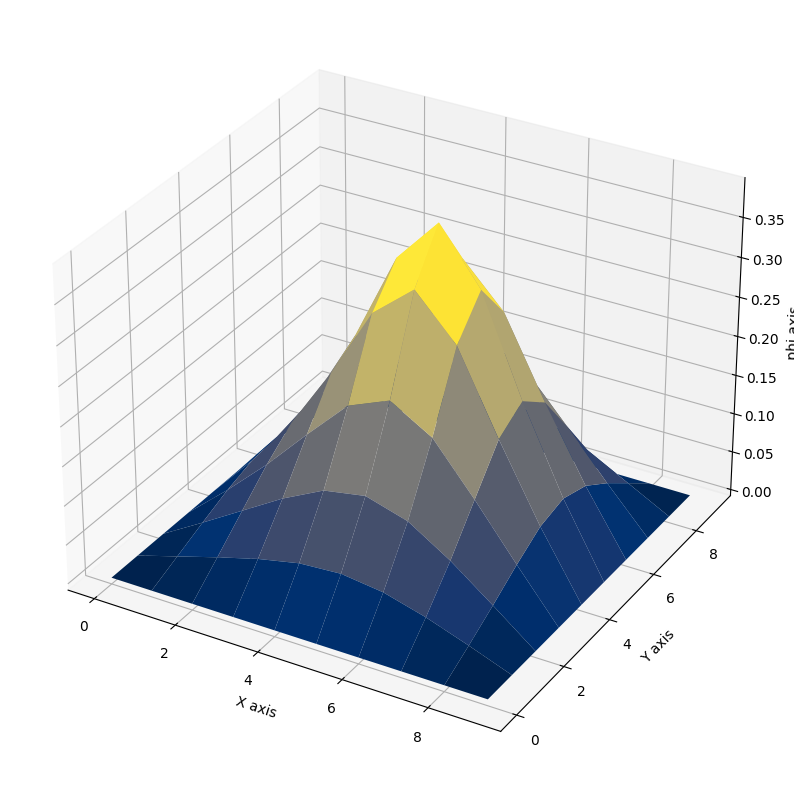

In [2]:
#syarat awal
jumlah_x = 10
jumlah_y = 10
delta_x = 0.5
delta_y = 0.5
jumlah_iterasi = 10000
epsilon_nol = 1

temp = np.zeros((jumlah_y,jumlah_x))
phi = np.zeros((jumlah_y,jumlah_x))
data_rho = np.zeros((jumlah_y,jumlah_x))

#distribusi gauss 2 dimensi
x_0 = 5 # nilai titik
y_0 = 5 # pusat

var_x = 1 # nilai varian
var_y = 1

for m in range(jumlah_y):
    for n in range(jumlah_x):
        gauss_2d = np.exp(-(((n-x_0)**2/(2*var_x))+((m-y_0)**2)/(2*var_y)))
        data_rho[m,n] = (gauss_2d)
        
np.savetxt('rho_dua_dimensi_cartesian.csv', data_rho, fmt = '%.11f', delimiter=',') #penyimpanan rho

# perhitungan phi
for k in range (jumlah_iterasi):
    for j in range (1, jumlah_y-1):
        for i in range (1, jumlah_x-1):
            phi[j,i] = ((((temp[j, i+1]+temp[j, i-1])/delta_x**2)+((temp[j+1, i]+temp[j-1, i])/delta_y**2)+(data_rho[j,i]/epsilon_nol))/2)*(delta_x**2 * delta_y**2)/(delta_y**2 + delta_x**2)
            temp[j,i] = phi[j,i]

np.savetxt('phi_dua_dimensi_cartesian.csv', phi, fmt = '%.15f', delimiter=',') #penyimpanan hasil phi

#plotting 
df = pd.read_csv('phi_dua_dimensi_cartesian.csv', header = None)

x = df.columns
y = df.index

X,Y = np.meshgrid(x,y)
Z = df.values

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('phi axis')

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

In [9]:
data_rho.shape

(10, 10)

# Distribusi rho dua dimensi kartesian

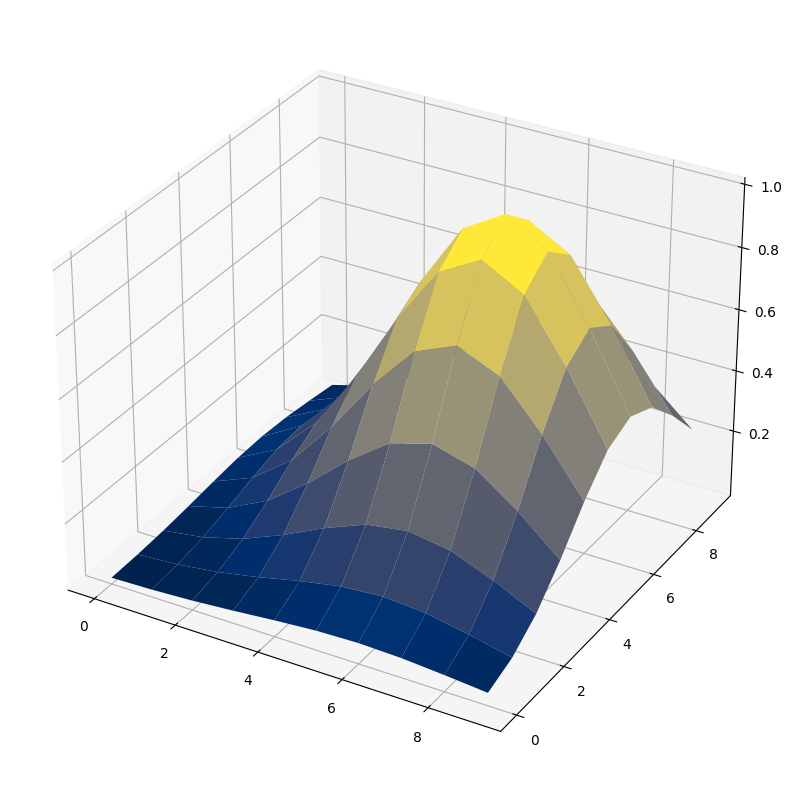

In [22]:
df = pd.read_csv('rho_dua_dimensi_cartesian_data.csv', header=None)

q = df.columns
r = df.index

Q,R = np.meshgrid(q,r)

S = df.values

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(R, Q, S, cmap = plt.cm.cividis)

In [2]:
#syarat awal
jumlah_x = 10
jumlah_y = 10
jumlah_titik = jumlah_x*jumlah_y
delta_x = 0.5
delta_y = 0.5
jumlah_iterasi = 10000
epsilon_nol = 1

temp = np.zeros((jumlah_y,jumlah_x))
phi = np.zeros((jumlah_y,jumlah_x))
data_rho = np.zeros((jumlah_y,jumlah_x))

#distribusi gauss 2 dimensi
x_0 = np.arange(1,jumlah_x) # nilai titik
y_0 = np.arange(1,jumlah_y) # pusat

var_x = np.arange(1,jumlah_x) # nilai varian
var_y = np.arange(1,jumlah_y)

def rho(jumlah_data):
    for g in range (jumlah_data):
        print('g=',g)
        for h in range (jumlah_titik):
            print(' h=',h)
            for i in (var_y):
                print('  i=',i)
                for j in (var_x):
                    print('   j=',j)
                    for k in (y_0):
                        print('    k=',k)
                        for l in (x_0):
                            print('      l=',l)
                            for m in range (jumlah_y):
                                print('       m=',m)
                                for n in range (jumlah_x):
                                    print('        n=',n)
                                    gauss_2d = np.exp(-(((n-x_0[l-1])**2/(2*var_x[j-1]))+((m-y_0[k-1])**2)/(2*var_y[i-1])))
                                    data_rho[h+1, g]: gauss_2d
    return data_rho
                                
results = Parallel(n_jobs=-1)(delayed(rho)(jumlah_data) for jumlah_data in range(5))
            
np.savetxt('rho_dua_dimensi_cartesian_data.csv', data_rho, fmt = '%.15f', delimiter=',') #penyimpanan rho

In [ ]:

from threading import Thread


def func_4_thread(n_max: int = 1_000_000) -> None:
    n = 0
    while n < n_max:
        n += 1


my_thread = Thread(target=func_4_thread, args=(10_000_000,))
my_thread.start()